
Colonne de salaire utilisée : 'salary'

Normalisation des salaires terminée :
   salaire_normalise  salary
0           0.601010  149000
1           0.454545  120000
2           0.191919   68000
3           0.454545  120000
4           0.601010  149000

Analyse par niveau d'expérience :
                  count          mean           std      min      25%  \
experience_level                                                        
Entry             126.0  36111.111111  16151.394849  30000.0  30000.0   
Executive          13.0  76076.923077  46860.540505  41000.0  43000.0   
Mid               305.0  51786.885246  20609.874641  30000.0  40000.0   
Senior            727.0  75088.033012  33560.733276  30000.0  63000.0   

                      50%       75%       max  
experience_level                               
Entry             30000.0   36000.0  140000.0  
Executive         46000.0  110000.0  175000.0  
Mid               51000.0   51000.0  160000.0  
Senior            68000.0   69000

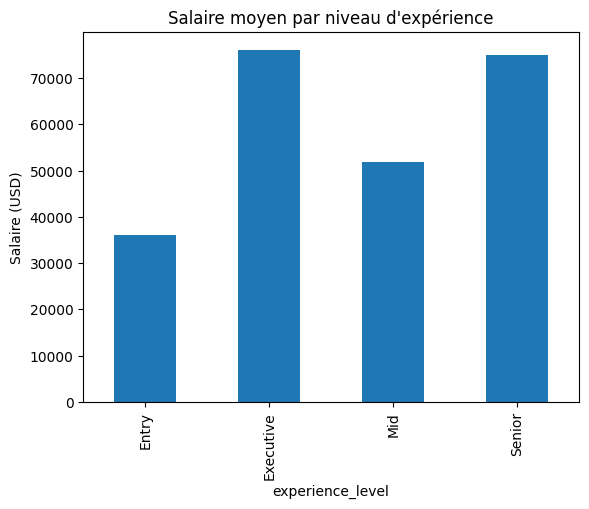


La variable remote_ratio n'existe pas dans les données

La variable work_year n'existe pas dans les données

La variable company_size n'existe pas dans les données

Aperçu des données transformées :
   Unnamed: 0       job_title   job_type experience_level       location  \
0           0  Data scientist  Full Time           Senior  New York City   
1           2  Data scientist  Full Time           Senior         Boston   
2           3  Data scientist  Full Time           Senior         London   
3           4  Data scientist  Full Time           Senior         Boston   
4           5  Data scientist  Full Time           Senior  New York City   

  salary_currency  salary  salaire_normalise  
0             USD  149000           0.601010  
1             USD  120000           0.454545  
2             USD   68000           0.191919  
3             USD  120000           0.454545  
4             USD  149000           0.601010  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Charger le fichier de données
df = pd.read_csv('datascience_salaries.csv')
   


# 2. Trouver la colonne des salaires
colonnes_salaire_possibles = ['salary_in_usd', 'salary', 'Salary_USD']
colonne_salaire = None

for col in colonnes_salaire_possibles:
    if col in df.columns:
        colonne_salaire = col
        break

if colonne_salaire is None:
    print("Erreur : Aucune colonne de salaire trouvée.")
    print("Colonnes disponibles :", df.columns.tolist())
    exit()

print(f"\nColonne de salaire utilisée : '{colonne_salaire}'")

# 3. Normalisation des salaires entre 0 et 1
salaire_min = df[colonne_salaire].min()
salaire_max = df[colonne_salaire].max()

# Formule de normalisation : (valeur - min) / (max - min)
df['salaire_normalise'] = (df[colonne_salaire] - salaire_min) / (salaire_max - salaire_min)

print("\nNormalisation des salaires terminée :")
print(df[['salaire_normalise', colonne_salaire]].head())

# 4. Analyse simple par niveau d'expérience
if 'experience_level' in df.columns:
    print("\nAnalyse par niveau d'expérience :")
    
    # Statistiques de base
    stats = df.groupby('experience_level')[colonne_salaire].describe()
    print(stats)
    
    # Diagramme en barres
    df.groupby('experience_level')[colonne_salaire].mean().plot(kind='bar')
    plt.title("Salaire moyen par niveau d'expérience")
    plt.ylabel("Salaire (USD)")
    plt.show()
else:
    print("\nLa colonne 'experience_level' n'existe pas dans les données")

# 5. Relation entre salaire et autres variables
variables_interet = ['remote_ratio', 'work_year', 'company_size']  # Exemples

for var in variables_interet:
    if var in df.columns:
        plt.figure(figsize=(8, 4))
        plt.scatter(df[var], df[colonne_salaire], alpha=0.5)
        plt.title(f"Relation entre {var} et salaire")
        plt.xlabel(var)
        plt.ylabel("Salaire (USD)")
        plt.show()
    else:
        print(f"\nLa variable {var} n'existe pas dans les données")

# 6. Affichage des données transformées
print("\nAperçu des données transformées :")
print(df.head())